# Comparing Kalman Filter Cost Prediction

In [244]:
# Loading event json
import json

# Plotting the timeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

filename = 'two-filter-comparison.txt'

## Comparison

In [245]:
with open(filename, 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(calc-signal)" in line]

In [246]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['Signal'] = [float(line.split()[5]) for line in filtered]

In [247]:
with open(filename, 'r') as file:
    container_events = [line.rstrip('\n') for line in file if "(container)" in line]

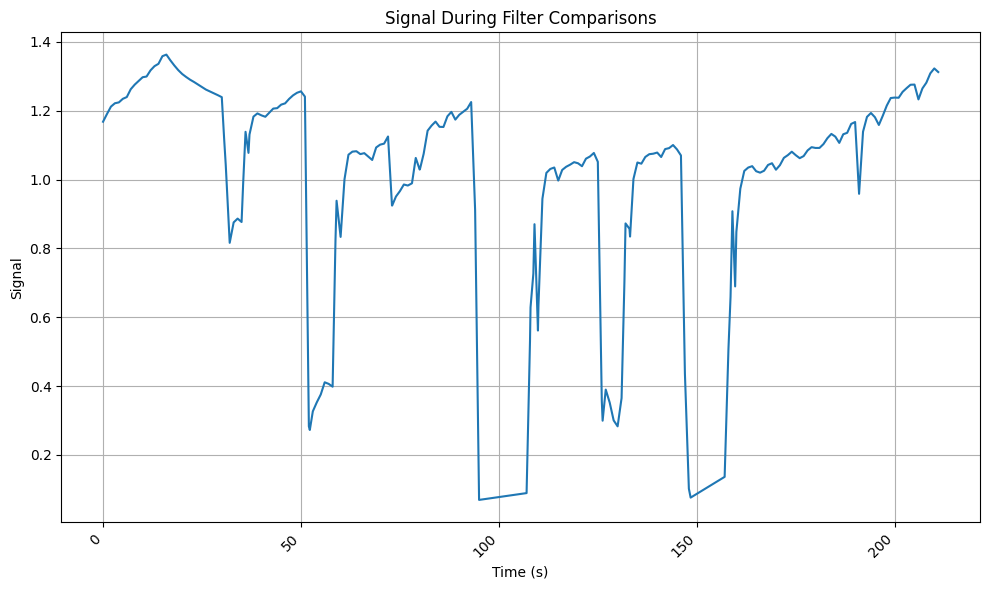

In [251]:
# 1. Parse time strings into datetime objects


start = datetime.strptime(data['time'][0], "%H:%M:%S.%f")
time_objects = [(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in data['time']]
container_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in container_events]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

ymin, ymax = plt.ylim()
text_y_position = ymax * 0.95

# for time in container_time[2:]:
#     plt.axvline(x=time, color='red', alpha=1, linestyle=(0, (8, 8)), linewidth=1)

# count = 0
# for event in events_dict.keys():
#     # Assuming events[event] is a list of time strings for that event
#     event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
#     for event_time_obj in event_times_objects:
#         plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
#         count += 1

# Customize the plot
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Signal During Filter Comparisons")
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/filter-signal.png')
plt.show()

In [210]:
with open(filename, 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(signal)" in line]

In [211]:
data = {}
data['metric time'] = [line.split()[1] for line in filtered if "y:" in line]
data['cpu'] = [float(line.split()[4][1:])  for line in filtered if "y:" in line]
data['mem'] = [float(line.split()[5][:-1])  for line in filtered if "y:" in line]
data['workload time'] = [line.split()[1] for line in filtered if "y=U:" in line]
data['cpu work'] = [float(line.split()[4][10:-1])  for line in filtered if "U:" in line]
data['mem work'] = [float(line.split()[5][:-1])  for line in filtered if "U:" in line]

In [212]:
with open(filename, 'r') as file:
    container_events = [line.rstrip('\n') for line in file if "(container)" in line]

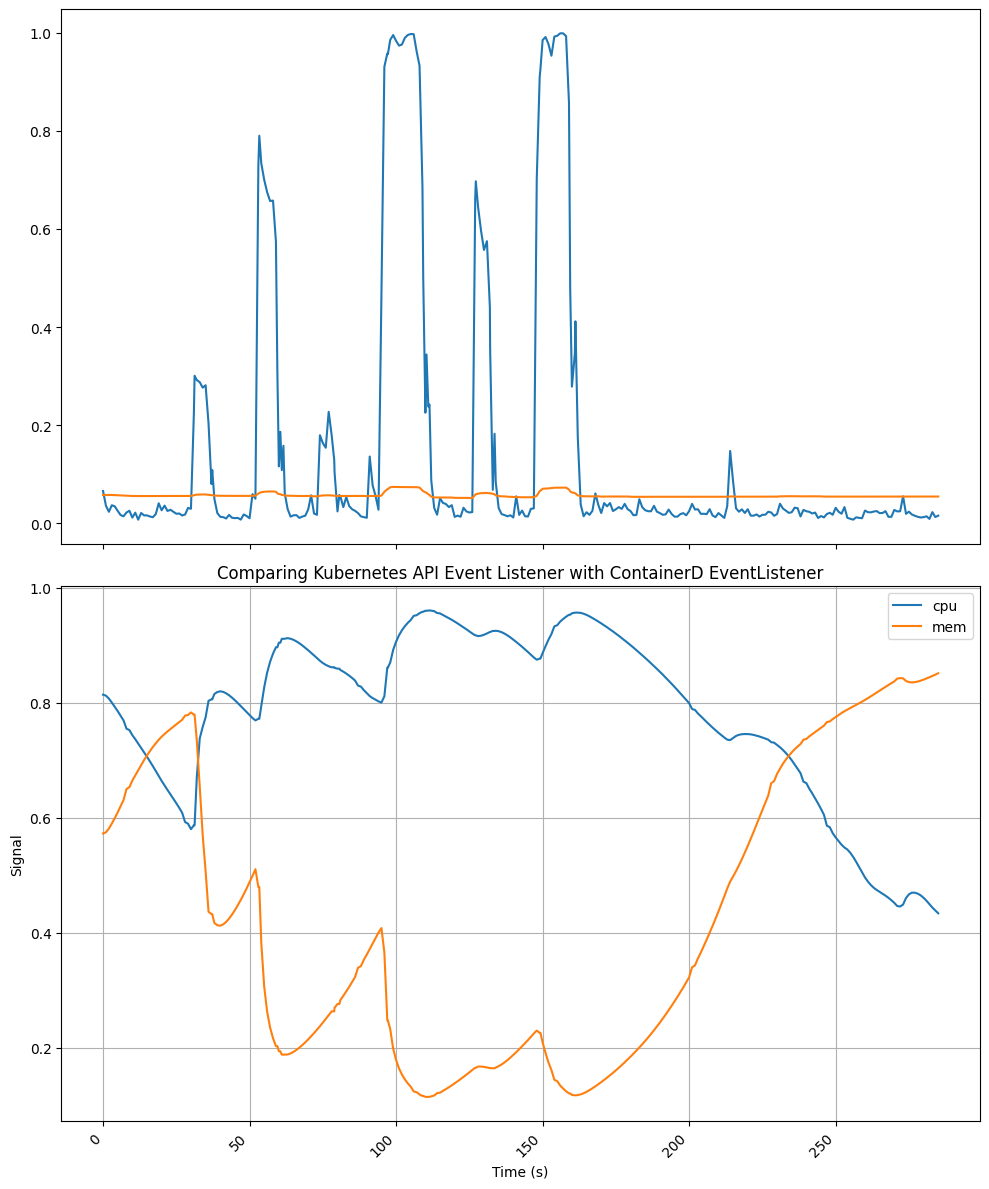

In [213]:
# 1. Parse time strings into datetime objects


start = datetime.strptime(data['metric time'][0], "%H:%M:%S.%f")
metric_time_objects = [(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in data['metric time']]
workload_time_objects = [(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in data['workload time']]
container_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in container_events]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

for key in data.keys():
    if key == 'time':
        continue

axes[0].plot(metric_time_objects, data['cpu'], label='cpu')
axes[0].plot(metric_time_objects, data['mem'], label='mem')

axes[1].plot(metric_time_objects, data['cpu work'], label='cpu')
axes[1].plot(metric_time_objects, data['mem work'], label='mem')

#plt.plot(time_objects, data['cpu some'], linestyle='-')

ymin, ymax = plt.ylim()
text_y_position = ymax * 0.95

# for time in container_time[2:]:
#     axes[0].axvline(x=time, color='red', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
#     axes[1].axvline(x=time, color='red', alpha=1, linestyle=(0, (8, 8)), linewidth=1)

# count = 0
# for event in events_dict.keys():
#     # Assuming events[event] is a list of time strings for that event
#     event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
#     for event_time_obj in event_times_objects:
#         plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
#         count += 1

# Customize the plot
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Comparing Kubernetes API Event Listener with ContainerD EventListener")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/event-comparison-overall.png')
plt.show()

In [252]:
with open(filename, 'r') as file:
    lines = file.readlines()
    kalman1d = [line.rstrip('\n') for line in lines if "(kalman-1d)" in line]
    kalman2d = [line.rstrip('\n') for line in lines if "(kalman-2d)" in line]
    two_kalman1d = [line.rstrip('\n') for line in lines if "(two-kalman-1d)" in line]
    container_events = [line.rstrip('\n') for line in lines if "(container)" in line]

kalman1d_dict= {}
kalman1d_dict['time'] = [line.split()[1] for line in kalman1d]
kalman1d_dict['cost'] = [-float(line.split()[4]) for line in kalman1d]
kalman1d_dict['cost']

kalman2d_dict= {}
kalman2d_dict['time'] = [line.split()[1] for line in kalman2d]
kalman2d_dict['capacity'] = [float(line.split()[4]) for line in kalman2d]
kalman2d_dict['cost'] = [-float(line.split()[6]) for line in kalman2d]

two_kalman1d_dict= {}
two_kalman1d_dict['time'] = [line.split()[1] for line in two_kalman1d]
two_kalman1d_dict['capacity'] = [float(line.split()[4]) for line in two_kalman1d]
two_kalman1d_dict['cost'] = [-float(line.split()[6]) for line in two_kalman1d]

container_events_dict = {}
container_events_dict['time'] = [line.split()[1] for line in container_events]

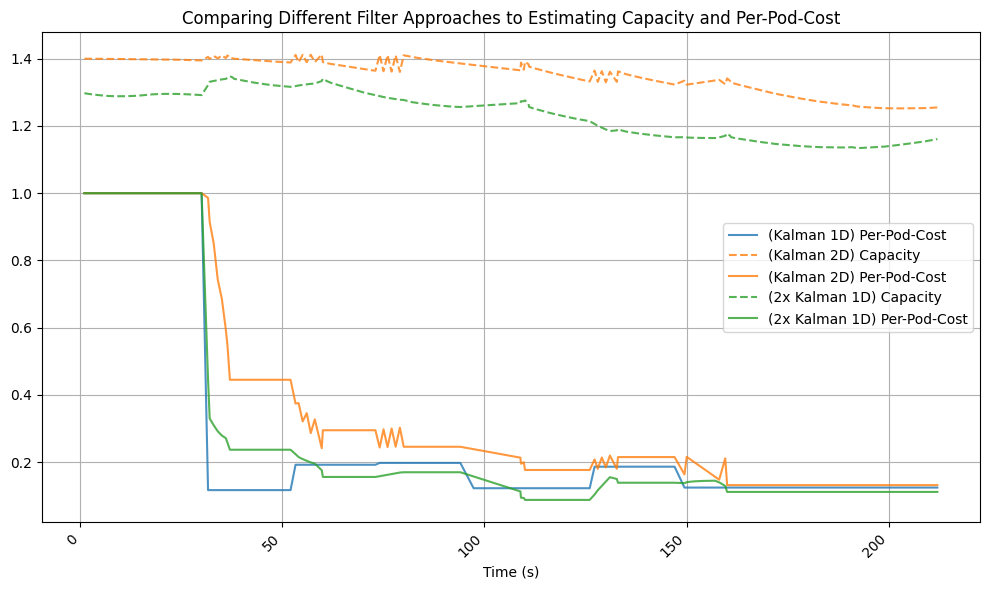

In [256]:
# 1. Parse time strings into datetime objects
start = datetime.strptime(lines[0].split()[1], "%H:%M:%S.%f")

fig, axes = plt.subplots(1, 1, figsize=(10, 6), sharex=True)

axes.plot([(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in kalman1d_dict['time']], 
             kalman1d_dict['cost'], color='#1f77b4', alpha=0.8, linestyle ="-",
             label='(Kalman 1D) Per-Pod-Cost')

axes.plot([(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in kalman2d_dict['time']], 
             kalman2d_dict['capacity'], color="#ff7f0e", linestyle ="--", alpha=0.8,
             label='(Kalman 2D) Capacity')
axes.plot([(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in kalman2d_dict['time']], 
             kalman2d_dict['cost'], color="#ff7f0e", linestyle ="-", alpha=0.8, 
             label='(Kalman 2D) Per-Pod-Cost')

axes.plot([(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in two_kalman1d_dict['time']], 
             two_kalman1d_dict['capacity'], color="#2ca02c", linestyle ="--", alpha=0.8, 
             label='(2x Kalman 1D) Capacity')
axes.plot([(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in two_kalman1d_dict['time']], 
             two_kalman1d_dict['cost'], color="#2ca02c", linestyle ="-", alpha=0.8, 
             label='(2x Kalman 1D) Per-Pod-Cost')

# for time in container_events_dict['time']:
#     axes[2].axvline(x=(datetime.strptime(time, "%H:%M:%S.%f") - start).total_seconds(),
#                 color='red', alpha=1, linestyle=(0, (8, 8)), linewidth=1)

# Customize the plot
plt.xlabel("Time (s)")
# plt.ylabel("Cost")
plt.title("Comparing Different Filter Approaches to Estimating Capacity and Per-Pod-Cost")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
# axes[2].set_xlim(200,300)

# Display the plot
plt.savefig('figures/filter-comparison.png')
plt.show()